# Intro to Univariate Volatility Forecasting with Arch

## Library Imports

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import yfinance as yf 
from arch import arch_model
from arch.univariate import ARX, GARCH, StudentsT, SkewStudent, Normal
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Importing S&P 500 Data from 10 years back

In [2]:
sp_500 = yf.download("^GSPC", period="10y", interval="1d")

[*********************100%***********************]  1 of 1 completed


In [3]:
sp_500_close = sp_500.Close
sp_500_close

Date
2014-09-10    1995.689941
2014-09-11    1997.449951
2014-09-12    1985.540039
2014-09-15    1984.130005
2014-09-16    1998.979980
                 ...     
2024-09-03    5528.930176
2024-09-04    5520.069824
2024-09-05    5503.410156
2024-09-06    5408.419922
2024-09-09    5471.049805
Name: Close, Length: 2516, dtype: float64

<Axes: xlabel='Date'>

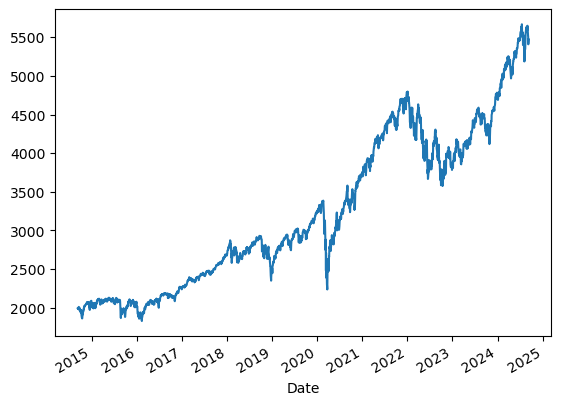

In [4]:
sp_500_close.plot.line()

## Calculate the log return

$ log\;return = ln(\frac{X_t}{X_{t-1}})$

In [5]:
sp_500_close_log_return = np.log(sp_500_close / sp_500_close.shift(1))

In [6]:
sp_500_close_log_return = sp_500_close_log_return.dropna()

<Axes: xlabel='Date'>

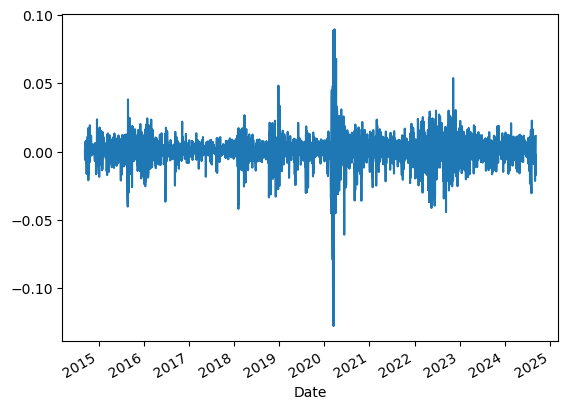

In [7]:
sp_500_close_log_return.plot.line()

## Default GARCH(1,1) Model With Constant Mean

mean model:  
$r_t = \mu + \epsilon_t$  
volatility model:  
$h_{t} = \sigma^{2}_{t} = \omega + \alpha\epsilon^{2}_{t-1} + \beta\sigma^{2}_{t-1}$  
$\epsilon_{t} = \sqrt{h_{t}}\epsilon_{t}, \; e_{t} \sim N(0,1)$  
Thus the model becomes:  
$r_t = \mu + \sqrt{h_{t}}\epsilon_{t}$

Note: Scaling Issues  
[1](https://quant.stackexchange.com/questions/50816/forecasting-volatility-using-garch-in-python-arch-package)  
[2](https://stats.stackexchange.com/questions/380174/do-parameters-stay-unchanged-when-garch-is-scaled)  
better to scale the return by multiplying with 100 to avoid convergence issues and rescale the forecast.  
  
Note: Annualizing Volatility  
[3](https://quantdare.com/annualizing-volatility/)  

In [8]:
am_constant = arch_model(sp_500_close_log_return, rescale=True)
res_constant = am_constant.fit(update_freq=5)

Iteration:      5,   Func. Count:     41,   Neg. LLF: 3237.988071753148
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3228.17136830213
            Iterations: 8
            Function evaluations: 56
            Gradient evaluations: 8


In [9]:
res_constant.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3228.17
Distribution:                  Normal   AIC:                           6464.34
Method:            Maximum Likelihood   BIC:                           6487.66
                                        No. Observations:                 2515
Date:                Tue, Sep 10 2024   Df Residuals:                     2514
Time:                        15:49:20   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0804  1.479e-02      5.437  5.415e-08 [5.143e-02,  0.109]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0386  9.905e-03      3.901  9.583e-05 [1.923e-02,5.805e-02]
alpha[1]       0.1958  2.979e-02      6.572  4.963e-11     [  0.137,  0.254]
beta[1]        0.7773  2.772e-02     28.040 5.321e-173     [  0.723,  0.832]
============================================================================

Covariance estimator: robust
"""

In [10]:
res_constant.scale

100.0

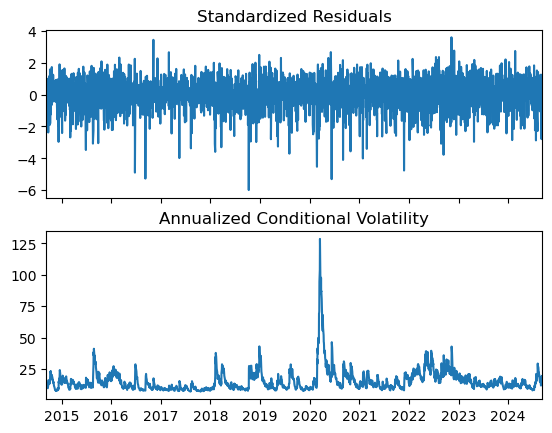

In [40]:
fig_constant = res_constant.plot(annualize="D")

## Garch Model with Autoregressive Mean and T-distributed Residuals

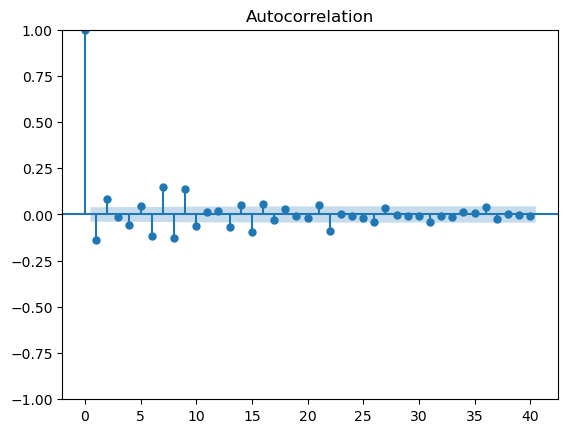

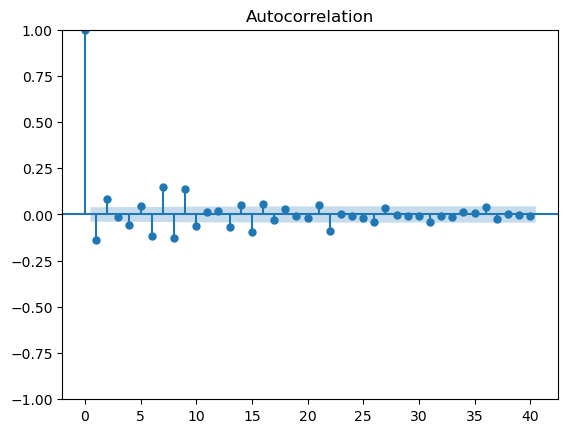

In [12]:
plot_acf(sp_500_close_log_return, lags=40)

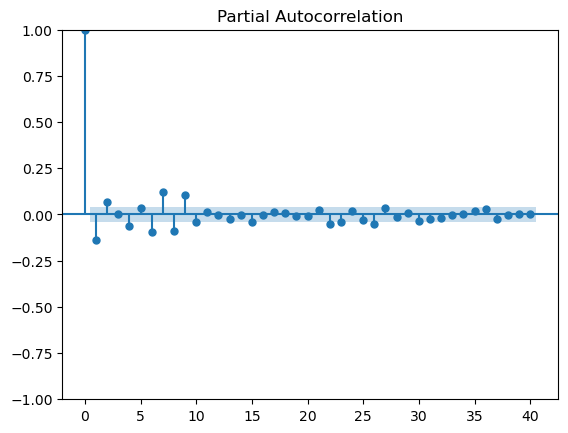

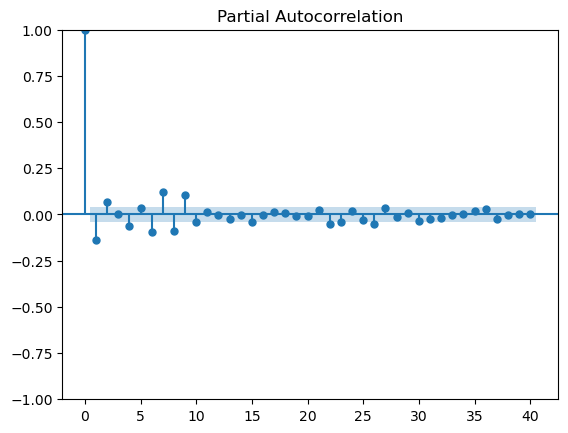

In [13]:
plot_pacf(sp_500_close_log_return, lags=40)

In [14]:
ar_gjr_studentT = ARX(sp_500_close_log_return, lags=[1], rescale=True)
ar_gjr_studentT

AR(constant: yes, lags: 1, no. of exog: 0, volatility: Constant Variance, distribution: Normal distribution), id: 0x21bba3f6a20

In [15]:
ar_gjr_studentT.volatility = GARCH(p=1, o=1, q=1)
ar_gjr_studentT.distribution = StudentsT()
res_gjr_studentT = ar_gjr_studentT.fit()

Iteration:      1,   Func. Count:      9,   Neg. LLF: 27530.94666173066
Iteration:      2,   Func. Count:     23,   Neg. LLF: 138057.94802958626
Iteration:      3,   Func. Count:     35,   Neg. LLF: 34188.674465175805
Iteration:      4,   Func. Count:     45,   Neg. LLF: 3976.3548842106675
Iteration:      5,   Func. Count:     55,   Neg. LLF: 149614.96052919564
Iteration:      6,   Func. Count:     65,   Neg. LLF: 3117.2383434710314
Iteration:      7,   Func. Count:     74,   Neg. LLF: 71555.70192350949
Iteration:      8,   Func. Count:     84,   Neg. LLF: 3114.268550186394
Iteration:      9,   Func. Count:     93,   Neg. LLF: 3115.2793028935607
Iteration:     10,   Func. Count:    102,   Neg. LLF: 3113.9158628759433
Iteration:     11,   Func. Count:    111,   Neg. LLF: 3112.0737479046484
Iteration:     12,   Func. Count:    120,   Neg. LLF: 3112.043668871147
Iteration:     13,   Func. Count:    128,   Neg. LLF: 3112.0415513099797
Iteration:     14,   Func. Count:    136,   Neg. LLF: 3

In [16]:
res_gjr_studentT.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AR - GJR-GARCH Model Results                            
====================================================================================
Dep. Variable:                        Close   R-squared:                       0.008
Mean Model:                              AR   Adj. R-squared:                  0.008
Vol Model:                        GJR-GARCH   Log-Likelihood:               -3112.04
Distribution:      Standardized Student's t   AIC:                           6238.08
Method:                  Maximum Likelihood   BIC:                           6278.89
                                              No. Observations:                 2514
Date:                      Tue, Sep 10 2024   Df Residuals:                     2512
Time:                              15:49:20   Df Model:                            2
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
Const          0.0700  1.308e-02      5.348  8.894e-08  [4.432e-02,9.560e-02]
Close[1]      -0.0367  2.064e-02     -1.779  7.526e-02 [-7.719e-02,3.738e-03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0252  5.275e-03      4.776  1.786e-06  [1.486e-02,3.553e-02]
alpha[1]       0.0186  1.684e-02      1.106      0.269 [-1.438e-02,5.164e-02]
gamma[1]       0.2834  4.492e-02      6.309  2.815e-10      [  0.195,  0.371]
beta[1]        0.8244  1.969e-02     41.874      0.000      [  0.786,  0.863]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             6.0372      0.761      7.933  2.131e-15 [  4.546,  7.529]
========================================================================

Covariance estimator: robust
"""

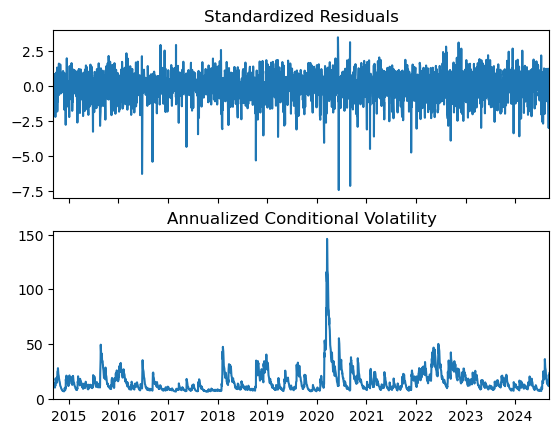

In [41]:
fig_gjr_studentT = res_gjr_studentT.plot(annualize="D")

## GJR-GARCH Model with Autoregressive Mean and Skew T distribution

In [18]:
ar_gjr_skewstudent = ARX(sp_500_close_log_return, lags=[1], rescale=True)
ar_gjr_skewstudent.volatility = GARCH(p=1, o=1, q=1)
ar_gjr_skewstudent.distribution = SkewStudent()
res_gjr_skewstudent = ar_gjr_skewstudent.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 40776.76450829482
Iteration:      2,   Func. Count:     25,   Neg. LLF: 343595.56132634456
Iteration:      3,   Func. Count:     38,   Neg. LLF: 143680.5921784435
Iteration:      4,   Func. Count:     49,   Neg. LLF: 100927.80568007627
Iteration:      5,   Func. Count:     60,   Neg. LLF: 129384.9220671968
Iteration:      6,   Func. Count:     70,   Neg. LLF: 3631.1354787503587
Iteration:      7,   Func. Count:     80,   Neg. LLF: 3160.074367285357
Iteration:      8,   Func. Count:     90,   Neg. LLF: 3134.346711801447
Iteration:      9,   Func. Count:    100,   Neg. LLF: 3101.757675348913
Iteration:     10,   Func. Count:    110,   Neg. LLF: 3441.2911699064507
Iteration:     11,   Func. Count:    121,   Neg. LLF: 3102.4278379257858
Iteration:     12,   Func. Count:    131,   Neg. LLF: 3194.5821726930662
Iteration:     13,   Func. Count:    142,   Neg. LLF: 3098.9125515727055
Iteration:     14,   Func. Count:    151,   Neg. LLF: 309

In [19]:
res_gjr_skewstudent.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               AR - GJR-GARCH Model Results                              
=========================================================================================
Dep. Variable:                             Close   R-squared:                       0.011
Mean Model:                                   AR   Adj. R-squared:                  0.010
Vol Model:                             GJR-GARCH   Log-Likelihood:               -3098.90
Distribution:      Standardized Skew Student's t   AIC:                           6213.81
Method:                       Maximum Likelihood   BIC:                           6260.44
                                                   No. Observations:                 2514
Date:                           Tue, Sep 10 2024   Df Residuals:                     2512
Time:                                   15:49:21   Df Model:                            2
                                  Mean Model                                  
==============================================================================
                 coef    std err          t      P>|t|        95.0% Conf. Int.
------------------------------------------------------------------------------
Const          0.0487  1.400e-02      3.483  4.959e-04   [2.132e-02,7.618e-02]
Close[1]      -0.0474  2.139e-02     -2.215  2.678e-02 [-8.930e-02,-5.448e-03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0256  5.220e-03      4.900  9.584e-07  [1.535e-02,3.581e-02]
alpha[1]       0.0209  1.641e-02      1.276      0.202 [-1.122e-02,5.311e-02]
gamma[1]       0.2759  4.410e-02      6.256  3.944e-10      [  0.189,  0.362]
beta[1]        0.8265  1.932e-02     42.785      0.000      [  0.789,  0.864]
                                Distribution                               
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
eta            6.9523      0.982      7.078  1.460e-12    [  5.027,  8.877]
lambda        -0.1499  3.016e-02     -4.969  6.745e-07 [ -0.209,-9.075e-02]
===========================================================================

Covariance estimator: robust
"""

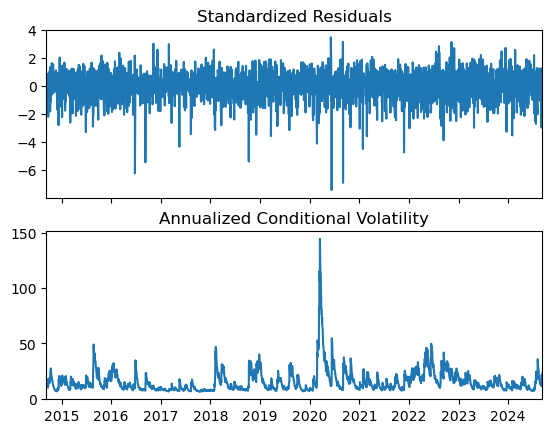

In [42]:
fig_gjr_skewstudent = res_gjr_skewstudent.plot(annualize="D")

## GJR-Garch Model with Autoregressive Mean and Normal Residuals

In [21]:
ar_gjr_normal = ARX(sp_500_close_log_return, lags=[1], rescale=True)
ar_gjr_normal.volatility = GARCH(p=1, o=1, q=1)
ar_gjr_normal.distribution = Normal()
res_gjr_normal = ar_gjr_normal.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 291248.7751563225
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2014460286916.4712
Iteration:      3,   Func. Count:     30,   Neg. LLF: 339503.4182022739
Iteration:      4,   Func. Count:     42,   Neg. LLF: 5612.786243261447
Iteration:      5,   Func. Count:     51,   Neg. LLF: 3940.8057812936822
Iteration:      6,   Func. Count:     60,   Neg. LLF: 4130.370783507447
Iteration:      7,   Func. Count:     69,   Neg. LLF: 3197.167204479261
Iteration:      8,   Func. Count:     77,   Neg. LLF: 3197.071488887403
Iteration:      9,   Func. Count:     85,   Neg. LLF: 3192.1677435911924
Iteration:     10,   Func. Count:     92,   Neg. LLF: 3192.1676526771885
Iteration:     11,   Func. Count:     99,   Neg. LLF: 3192.167650628975
Iteration:     12,   Func. Count:    105,   Neg. LLF: 3192.167650629269
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3192.167650628975
            Iterations: 

In [22]:
res_gjr_normal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         AR - GJR-GARCH Model Results                         
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.012
Mean Model:                        AR   Adj. R-squared:                  0.012
Vol Model:                  GJR-GARCH   Log-Likelihood:               -3192.17
Distribution:                  Normal   AIC:                           6396.34
Method:            Maximum Likelihood   BIC:                           6431.31
                                        No. Observations:                 2514
Date:                Tue, Sep 10 2024   Df Residuals:                     2512
Time:                        15:49:21   Df Model:                            2
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
Const          0.0532  1.444e-02      3.689  2.255e-04 [2.495e-02,8.154e-02]
Close[1]      -0.0581  2.434e-02     -2.387  1.700e-02  [ -0.106,-1.039e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0374  8.645e-03      4.322  1.544e-05 [2.042e-02,5.431e-02]
alpha[1]       0.0702  3.756e-02      1.869  6.159e-02  [-3.407e-03,  0.144]
gamma[1]       0.2228  4.880e-02      4.566  4.976e-06     [  0.127,  0.318]
beta[1]        0.7897  3.013e-02     26.207 2.205e-151     [  0.731,  0.849]
============================================================================

Covariance estimator: robust
"""

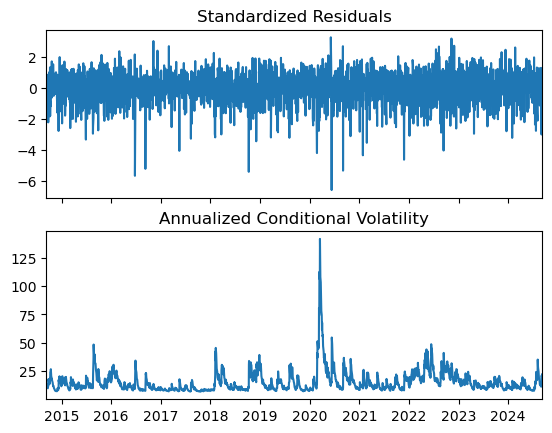

In [43]:
fig_gjr_normal = res_gjr_normal.plot(annualize="D")

## Comparing Model using AIC

When using AIC to compare model, lower is better.

In [24]:
res_constant.aic

6464.34273660426

In [25]:
res_gjr_normal.aic

6396.33530125795

In [26]:
res_gjr_skewstudent.aic

6213.80603675773

In [27]:
res_gjr_studentT.aic

6238.083099058081

The scale of the model (as all the model is rescaled).

In [28]:
res_constant.scale

100.0

In [29]:
res_gjr_normal.scale

100.0

In [30]:
res_gjr_skewstudent.scale

100.0

In [31]:
res_gjr_studentT.scale

100.0

The best model is a GARCH(1,1) model with skew student T residuals and autoregressive mean.  

## Forecasting Volatility

Analytical Forecast: Available for Most Models That Evolve In Terms of The Squares of The Residuals.  
exploits the relationship $\alpha E_{t}[\epsilon^{2}_{t+1}] = \sigma^{2}_{t+1}$

$\sigma^{2}_{t+1} = \omega + \alpha\epsilon^{2}_{t} + \beta\sigma^{2}_{t}$  
$\sigma^{2}_{t+1} = \omega + \alpha E_{t}[\epsilon^{2}_{t+h-1}] + \beta E_{t}[\sigma^{2}_{t+h-1}] \; h\geq2$  
$\sigma^{2}_{t+1} = \omega + (\alpha + \beta)E_{t}[\sigma^{2}_{t+h-1}] \; h\geq2$

Example of forecasting volatility 30 day forward.  

In [34]:
forecast_30 = res_gjr_skewstudent.forecast(horizon=30)
forecast_30

In [119]:
forecast_30.variance

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,...,h.21,h.22,h.23,h.24,h.25,h.26,h.27,h.28,h.29,h.30
Date,,,,,,,,,,,,,,,,,,,,,
2024-09-09,1.786679,1.790241,1.789807,1.789372,1.788942,1.788519,1.788102,1.787691,1.787286,1.786887,...,1.782864,1.782529,1.7822,1.781875,1.781554,1.781239,1.780928,1.780622,1.78032,1.780022


Now, we rescale the volatility, note that in GARCH $r_{t} = \mu + \sqrt{h_{t}} \epsilon_{t}$ and we scale our return data $r_{t} \times 100$ for convergence purposes, to get the variance in the real scale we must calculate $r_{t \; rescaled} = \frac{r_{t}}{scale^{2}}$  

In [45]:
forecast_30_variance_rescaled = forecast_30.variance / np.power(res_gjr_skewstudent.scale, 2)

In [46]:
forecast_30_variance_rescaled

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,...,h.21,h.22,h.23,h.24,h.25,h.26,h.27,h.28,h.29,h.30
Date,,,,,,,,,,,,,,,,,,,,,
2024-09-09,0.000179,0.000179,0.000179,0.000179,0.000179,0.000179,0.000179,0.000179,0.000179,0.000179,...,0.000178,0.000178,0.000178,0.000178,0.000178,0.000178,0.000178,0.000178,0.000178,0.000178


In [47]:
forecast_30_variance_rescaled = forecast_30_variance_rescaled.transpose()
forecast_30_variance_rescaled

Date,2024-09-09
h.01,0.000179
h.02,0.000179
h.03,0.000179
h.04,0.000179
h.05,0.000179
h.06,0.000179
h.07,0.000179
h.08,0.000179
h.09,0.000179
h.10,0.000179


## Appendix: Options Pricing via GARCH forecast Ala Duan1995

First let's find out how to actually simulate brownian process

Average value at final timestep: 105.25


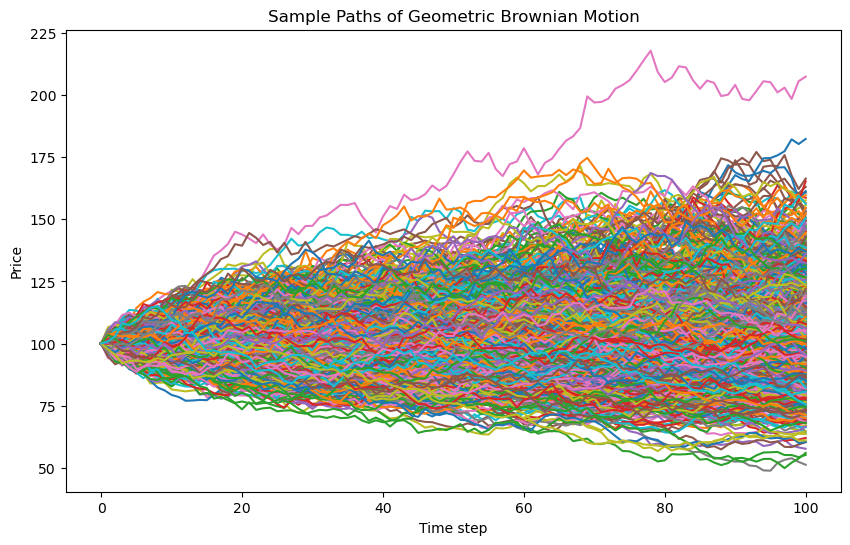

In [49]:
def generate_gbm_paths(S0, mu, sigma, T, n, m):
    """
    Generate M paths of Geometric Brownian Motion (GBM) with N steps.

    Parameters:
    - S0: Initial stock price
    - mu: Drift coefficient
    - sigma: Volatility (standard deviation)
    - T: Time horizon (e.g., 1 year)
    - n: Number of time steps
    - m: Number of simulation paths

    Returns:
    - gbm_paths: Simulated paths of GBM
    """
    dt = T / n  # Time step size
    gbm_paths = np.zeros((m, n + 1))
    gbm_paths[:, 0] = S0  # Initial price

    for i in range(1, n + 1):
        # Generate random variables for Brownian motion (standard normal distribution)
        Z = np.random.standard_normal(m)
        # Simulate GBM: S(t+dt) = S(t) * exp((mu - 0.5 * sigma^2) * dt + sigma * sqrt(dt) * Z)
        gbm_paths[:, i] = gbm_paths[:, i - 1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

    return gbm_paths

def calculate_average_at_timestep(gbm_paths, timestep):
    """
    Calculate the average value at a specific timestep across all paths.

    Parameters:
    - gbm_paths: Simulated paths of GBM
    - timestep: Timestep index (0 to n)

    Returns:
    - Average value at the specified timestep
    """
    return np.mean(gbm_paths[:, timestep])

# Parameters
S0 = 100  # Initial stock price
mu = 0.05  # Drift coefficient
sigma = 0.2  # Volatility (20%)
T = 1  # Time horizon (e.g., 1 year)
n = 100  # Number of time steps
m = 1000  # Number of simulation paths

# Generate GBM paths
gbm_paths = generate_gbm_paths(S0, mu, sigma, T, n, m)

# Calculate the average value at the final timestep (n)
average_value_at_final_timestep = calculate_average_at_timestep(gbm_paths, n)
print(f"Average value at final timestep: {average_value_at_final_timestep:.2f}")

# Plotting the first 10 paths for visualization
plt.figure(figsize=(10, 6))
plt.plot(gbm_paths[:1000].T)  # Plot the first 10 paths
plt.title("Sample Paths of Geometric Brownian Motion")
plt.xlabel("Time step")
plt.ylabel("Price")
plt.show()

Modified for our use case.

In [83]:
def generate_gbm_paths(S0, mu, sigma, T, n, m):
    
    dt = T / n 
    gbm_paths = np.zeros((m, n + 1))
    gbm_paths[:, 0] = S0  

    for i in range(1, n + 1):
        Z = np.random.standard_normal(m)
        
        gbm_paths[:, i] = gbm_paths[:, i - 1] + (mu * gbm_paths[:, i - 1] * dt) + (sigma * gbm_paths[:, i - 1] * np.sqrt(dt) * Z)

    return gbm_paths

In [84]:
def calculate_average_at_timestep(gbm_paths, timestep):
    return np.mean(gbm_paths[:, timestep])

In [85]:
s0 = 100  # Initial stock price
mu = 0.05  # Drift coefficient
sigma = 0.2  # Volatility (20%)
T = 1  # Time horizon (e.g., 1 year)
n_steps = 100  # Number of time steps
m_chains = 1000  # Number of simulation paths

In [86]:
gbm_paths = generate_gbm_paths(s0, mu, sigma, T, n_steps, m_chains)

In [87]:
gbm_paths

array([[100.        , 102.66721945, 105.52925753, ...,  97.56350864,
         95.08506579,  94.35171563],
       [100.        ,  94.60899118,  97.75425124, ..., 113.5863813 ,
        114.27315603, 115.42879661],
       [100.        ,  99.39225411, 103.56270449, ..., 141.60501913,
        146.18773938, 147.24221799],
       ...,
       [100.        ,  99.55811049,  96.58282875, ..., 100.70061311,
         98.28973775,  99.43687994],
       [100.        ,  99.48982007,  97.37944366, ...,  88.20128382,
         91.71931578,  94.81536318],
       [100.        , 100.22433297, 100.56526236, ..., 113.77004893,
        116.93441734, 118.20042674]])

In [88]:
average_value_at_final_timestep = calculate_average_at_timestep(gbm_paths, n_steps)

Average value at final timestep: 105.76


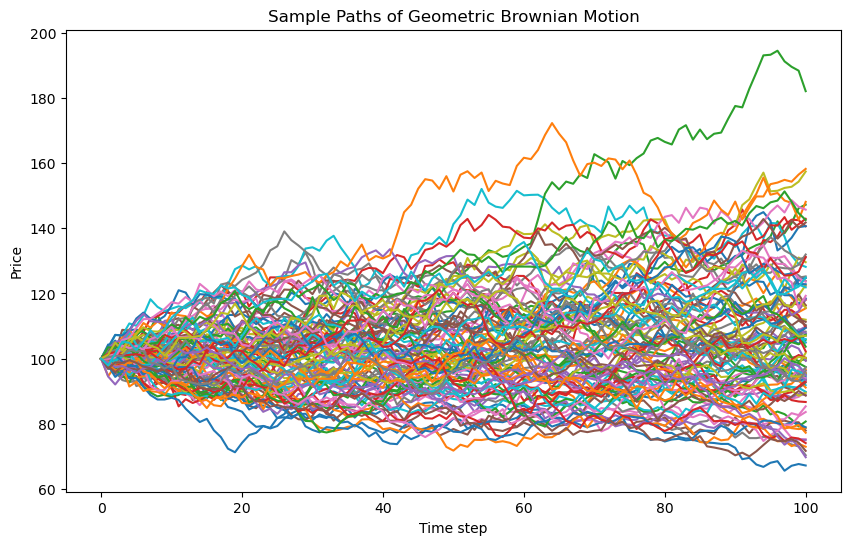

In [93]:
# Calculate the average value at the final timestep (n)
average_value_at_final_timestep = calculate_average_at_timestep(gbm_paths, n)
print(f"Average value at final timestep: {average_value_at_final_timestep:.2f}")

# Plotting the first 10 paths for visualization
plt.figure(figsize=(10, 6))
plt.plot(gbm_paths[:100].T)  # Plot the first 10 paths
plt.title("Sample Paths of Geometric Brownian Motion")
plt.xlabel("Time step")
plt.ylabel("Price")
plt.show()

## Simulate GARCH Option Pricing Model

In [117]:
def GARCH_european_call_Option_Pricer(S0, K, h_arr, r, T, m):
    discount_factor = np.exp(-r * T)
    
    hs = np.sum(h_arr)  # Sum of volatility terms
    xt = np.zeros((m, 2))  # Array to store paths
    xt[:, 0] = S0  # Initialize all paths with the initial stock price
    
    for j in range(m):  # Use 'j' instead of 'i' for the outer loop
        es = np.zeros(T)  # Correct the shape to be 1-dimensional
        
        for i in range(T):  # Inner loop uses 'i'
            es[i] = np.random.normal(0, np.sqrt(h_arr[i]))  # Generate random shock with std deviation sqrt(h_arr[i])
            
        es_sum = np.sum(es)  # Sum of shocks
        xt[j, 1] = xt[j, 0] * np.exp((T * r) - (0.5 * hs) + es_sum)  # Update price path
    
    # Calculate payoff: max(S_T - K, 0) for each path
    payoff = np.maximum(xt[:, 1] - K, 0)  # Correct to use np.maximum for element-wise max
    expected_payoff = np.mean(payoff)  # Average of all payoffs
    call_price = discount_factor * expected_payoff  # Discounted payoff

    return call_price, expected_payoff, xt  # Return the calculated call price

# Example usage
S0 = 100  # Initial stock price
K = 110  # Strike price
h_arr = np.array(forecast_30_variance_rescaled).flatten()  # Example volatility array
r = ((1 + 0.05) ** (1/365)) - 1  # Risk-free interest rate
T = 30  # Time to maturity (e.g., 1 year)
m = 1000  # Number of simulation paths

# Calculate the European call option price
call_price, expected_payoff, xt = GARCH_european_call_Option_Pricer(S0, K, h_arr, r, T, m)
print(f"European Call Option Price: {call_price:.2f}")
print(f"Expected Payoff: {expected_payoff:.2f}")
xt

European Call Option Price: 0.39
Expected Payoff: 0.39


array([[100.        , 103.5574391 ],
       [100.        ,  94.62225817],
       [100.        ,  92.78603378],
       ...,
       [100.        ,  93.21328002],
       [100.        , 102.29419775],
       [100.        ,  90.47473216]])

In [103]:
np.array(forecast_30_variance_rescaled).flatten()

array([0.00017867, 0.00017902, 0.00017898, 0.00017894, 0.00017889,
       0.00017885, 0.00017881, 0.00017877, 0.00017873, 0.00017869,
       0.00017865, 0.00017861, 0.00017857, 0.00017853, 0.0001785 ,
       0.00017846, 0.00017843, 0.00017839, 0.00017835, 0.00017832,
       0.00017829, 0.00017825, 0.00017822, 0.00017819, 0.00017816,
       0.00017812, 0.00017809, 0.00017806, 0.00017803, 0.000178  ])

In [95]:
S0 = 100
r = 0.05
K = 110
h_arr = forecast_30_variance_rescaled
T = 30
m = 1000

In [96]:
xt = GARCH_european_call_Option_Pricer(S0, K, h_arr, r, T, m)

e:\Programs\miniforge3\envs\quant_paper_replication\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


KeyError: 0